<a href="https://colab.research.google.com/github/malaaaky/Hotel-Reservation-ML/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [35]:
df=pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#Analyze

In [36]:
#drop column Booking_ID
df.drop('Booking_ID', axis=1, inplace=True)

In [37]:
#check nulls
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [38]:
#check duplicates
df.duplicated().sum()

10275

In [39]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(26000, 18)

In [41]:
#get max number of no_of_week_nights
df['no_of_week_nights'].max()

17

In [42]:
#get min number of no_of_week_nights
df['no_of_week_nights'].min()

0

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,26000.0,1.890000,0.528702,0.0,2.00,2.0,2.0,4.0
no_of_children,26000.0,0.141231,0.462502,0.0,0.00,0.0,0.0,10.0
no_of_weekend_nights,26000.0,0.882385,0.887371,0.0,0.00,1.0,2.0,7.0
no_of_week_nights,26000.0,2.261923,1.512341,0.0,1.00,2.0,3.0,17.0
required_car_parking_space,26000.0,0.042115,0.200856,0.0,0.00,0.0,0.0,1.0
lead_time,26000.0,66.452846,68.606799,0.0,12.00,44.0,100.0,443.0
arrival_year,26000.0,2017.850269,0.356814,2017.0,2018.00,2018.0,2018.0,2018.0
arrival_month,26000.0,7.332923,3.138925,1.0,5.00,8.0,10.0,12.0
arrival_date,26000.0,15.750231,8.849394,1.0,8.00,16.0,23.0,31.0
repeated_guest,26000.0,0.032769,0.178035,0.0,0.00,0.0,0.0,1.0


In [44]:
#types of meal
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [45]:
#types of rooms
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [46]:
#3adad unique values
df['room_type_reserved'].nunique()

7

In [47]:
#profit of the hotel using avg_price
df['avg_price_per_room'].sum()


2748091.8

In [48]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [49]:
#analysis ala kol columns mara wahda
def column_info(df):
  cols=[]
  dtypes=[]
  unique_values=[]
  nunique_values=[]

#loop ala kol columns
  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype)
    unique_values.append(df[col].unique())
    nunique_values.append(df[col].nunique())

#return dataframe fe dictionnaries
  return pd.DataFrame({'column_name':cols,
                        'data_type':dtypes,
                        'unique_values':unique_values,
                        'nunique_values':nunique_values})

In [50]:
column_info(df)

,column_name,data_type,unique_values,nunique_values
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5
1,no_of_children,int64,"[0, 2, 1, 3, 10, 9]",6
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4
5,required_car_parking_space,int64,"[0, 1]",2
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352
8,arrival_year,int64,"[2017, 2018]",2
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12


- adult = 0 can be :
1. law el booking got canceled
2. the room is childrens only

- children = 9/10 can be fault in data entry.

- check if weekend and weeknights both are 0, check if its canceled.


###Check adults

In [51]:
# i want to see if the 0 are indeed canceled bookings or not
df[df['no_of_adults']==0][['booking_status']].value_counts()

,count
booking_status,
Not_Canceled,92
Canceled,43


In [52]:
# see if the 0 are children only
df[df['no_of_adults']==0][['no_of_children']].value_counts()

,count
no_of_children,
2,129
3,5
1,1


###Check Children

In [53]:
#only wahda yeba akid fault can drop OR REPLACE MODE, momken ataaked men avg_price_per_room
df[df['no_of_children']==10]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled


In [54]:
df[df['no_of_children']==9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
10041,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.0,0,Not_Canceled
10061,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.5,1,Canceled


In [55]:
#can replace with mode or 0
df['no_of_children'].replace(9,0,inplace=True)
df['no_of_children'].replace(10,0,inplace=True)

In [56]:
df['no_of_children'].value_counts()

,count
no_of_children,
0,23425
1,1524
2,1033
3,18


###Check Weekend and Weeknights

In [57]:
#see if there exists nas
df[df['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

,count
no_of_week_nights,
1,3876
2,3089
3,2606
4,1237
5,204
0,75


In [58]:
df[df['no_of_weekend_nights']==0][df['no_of_week_nights']==0]['booking_status'].value_counts()

<ipython-input-58-38776b32c8e9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['no_of_weekend_nights']==0][df['no_of_week_nights']==0]['booking_status'].value_counts()


,count
booking_status,
Not_Canceled,73
Canceled,2


0 in both case and not canceled msh mantekeya, can be data entry error--> replaced it with mode or most frequent #nights.

In [60]:
df.reset_index(drop=True, inplace=True)

this will produce error:
3ashan when i drop duplicates, row gets deleted but remains empty 2same index -->so it can't loop over empty rows.

To Handle:

must reset index with inplace=True++ **drop=True** 3ashan the **new generated column index** resulteing from shift el beyhsal fel row ashilo.

In [61]:
for i in range(len(df)):
  if df.loc[i,'no_of_weekend_nights']==0 and df.loc[i,'no_of_week_nights']==0:
    df.loc[i,'no_of_week_nights']=1

#Lead-time

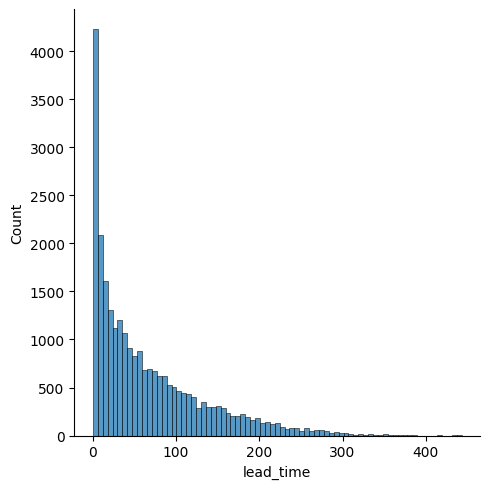

In [62]:
sns.displot(df['lead_time'])

lead-time=0:
- reservation happens in same day.
- didn't book through website.

lead-time >200
- yearly vacation le nas -->should check book status to influence some data-driven actions.

In [63]:
#Check their cbook status
filtered_df=df[df['lead_time']>100]
filtered_df['booking_status'].value_counts()

,count
booking_status,
Canceled,3432
Not_Canceled,3009


#Pre-processing

In [64]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_

#Encoding
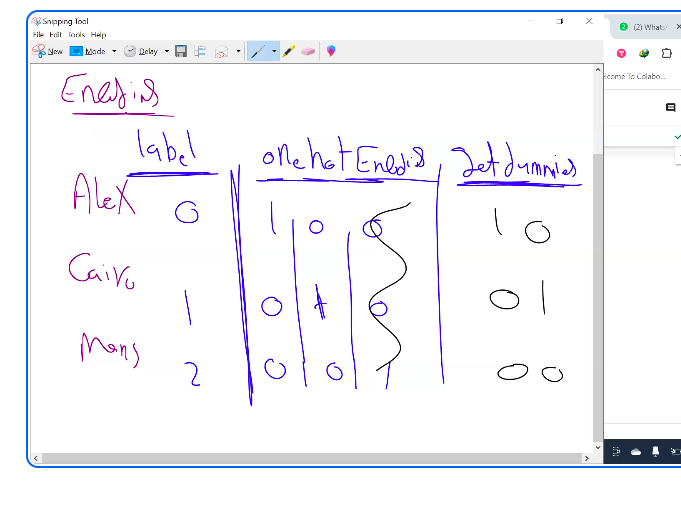

In [66]:
encoder= LabelEncoder()
df['booking_status']= encoder.fit_transform(df['booking_status'])
df['booking_status'].value_counts()

,count
booking_status,
1,18558
0,7442


In [67]:
#dtype=int 3ashan will replace with True or False which still obj bardo
df= pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


#Check Balance

- check distribution of the target variable soo i can't train the model right.

- can check output ONLY using value count or rasma.

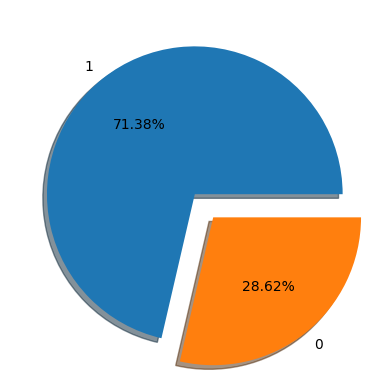

In [71]:
#explode attribut beyb3edhom 3an ba3d for better display
plt.pie(x=df['booking_status'].value_counts(), labels=df['booking_status'].unique(),explode=[0,.2],shadow=True, autopct='%1.2f%%')
plt.show()

#Split Data

In [72]:
x=df.drop('booking_status', axis=1)
y=df['booking_status']

In [73]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=42)

#Scaling
- on Input ONLY.
- mafish variable yeghaty ala variable tany through range el arkam.

- if range kebir, model get biased lel feature de--> to handle: scale 3ashan asghar range el arkam.

In [74]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

#Evalute Function

In [80]:
def evaluate_model(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('Percesion: ', precision_score(y_test, y_pred))
    print('F1 Score: ', f1_score(y_test, y_pred))

#Logistic regression

In [75]:
#class_weight due en data is not balanced
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [76]:
y_pred= model.predict(x_test)

In [79]:
evaluate_model(y_test, y_pred)

Accuracy:  0.7765384615384615
Recall:  0.7710389377355105
Percesion:  0.9019731318219983
F1 Score:  0.8313824126922705


#Random Forest

In [84]:
model2= RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=12)
model2.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12)

In [85]:
y_pred2= model2.predict(x_test)

In [86]:
evaluate_model(y_test, y_pred2)

Accuracy:  0.8511538461538461
Recall:  0.8914408756504576
Percesion:  0.8993482983345402
F1 Score:  0.8953771289537714


better accuracy 3ashan random forest is better.